In [6]:
import pandas as pd
import numpy as np
from sush_pca import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()
scaler = StandardScaler()

In [2]:
df_wine = pd.read_csv('wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [8]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

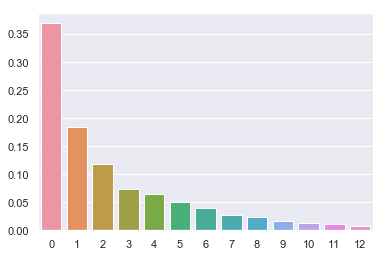

In [9]:
pca_test = PCA(n_components=2)
X_pca_train = pca_test.fit_transform(X_train_std)
ax = sns.barplot(x= list(range(13)), y=pca_test.explaned_varaince_ratio)

In [12]:
pca_test.W_transform

array([[ 0.26283426, -0.12783451],
       [-0.26676921,  0.08064016],
       [-0.11554255,  0.01679249],
       [ 0.19948341, -0.11084566],
       [ 0.02890188,  0.07938796],
       [-0.06638686, -0.49145931],
       [-0.21334908, -0.0503074 ],
       [ 0.18639128,  0.17532803],
       [ 0.16808299, -0.00367596],
       [-0.46636903,  0.35975654],
       [-0.53248388,  0.04046698],
       [ 0.23783528,  0.74222954],
       [ 0.36776336,  0.03873952]])